In [18]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [7]:
# Tamanho padrão da imagem para o modelo
IMAGE_SIZE = (150, 150)

# Caminho da pasta contendo as subpastas 'smile' e 'non_smile'
DATASET_PATH = "../../../data/Face_Data-Smiling_or_Not" 

os.listdir(DATASET_PATH)

['smile', 'non_smile']

In [26]:
def select_random_image_path(label):
    # label - smile or non_smile
    img_name = random.choice(os.listdir(os.path.join(DATASET_PATH, label)))
    return os.path.join(DATASET_PATH, label, img_name)

# Função para pré-processar a imagem (OpenCV)
def prepare_image_cv(img_rgb):
    img_resized = cv2.resize(img_rgb, IMAGE_SIZE)
    img_array = img_to_array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def image_read(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def inference(img, model):
    img_array = prepare_image_cv(img)
    prediction = model.predict(img_array, verbose=False)[0][0]
    label = "😊 Sorrindo" if prediction >= 0.5 else "😐 Não sorrindo"
    confidence = prediction if prediction >= 0.5 else 1 - prediction

    print(f"Resultado: **{label}**")
    print(f"Confiança: **{confidence:.2%}**")


In [24]:
# Carregando o modelo
model = load_model("best_model.h5")

Resultado: **😊 Sorrindo**
Confiança: **79.39%**


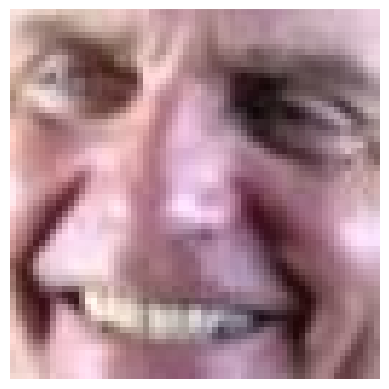

In [27]:
img_path = select_random_image_path(label='smile')

img = image_read(img_path)
inference(img, model)

plt.imshow(img)
plt.axis('off')
plt.show()

Resultado: **😐 Não sorrindo**
Confiança: **66.34%**


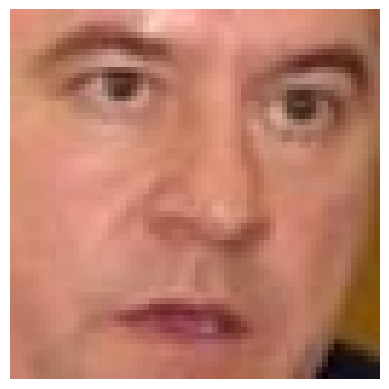

In [28]:
img_path = select_random_image_path(label='non_smile')

img = image_read(img_path)
inference(img, model)

plt.imshow(img)
plt.axis('off')
plt.show()